In [36]:
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('twitter_training.csv', header=None)

# Display the first few rows of the dataset
print(df.head())

# Check the columns in the dataset
print(df.columns)

      0            1         2  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                   3  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
Index([0, 1, 2, 3], dtype='int64')


In [37]:
# Assuming the text is in the last column (index 3)
text_column_index = 3

# Function to clean the text data
def clean_tweet(tweet):
    tweet = str(tweet)  # Convert to string to avoid TypeError
    tweet = re.sub(r'@\w+', '', tweet)  # Remove mentions
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)  # Remove URLs
    tweet = re.sub(r'\d+', '', tweet)  # Remove numbers
    tweet = tweet.lower()  # Convert to lowercase
    tweet = tweet.strip()  # Remove leading/trailing whitespace
    return tweet

# Apply the cleaning function to the text column
df['cleaned_text'] = df[text_column_index].apply(clean_tweet)

# Function to get sentiment polarity
def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    return analysis.sentiment.polarity

# Apply sentiment analysis
df['sentiment_score'] = df['cleaned_text'].apply(get_sentiment)

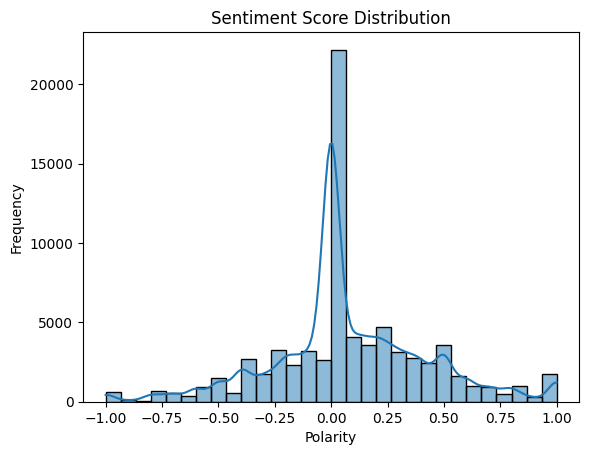

In [38]:
# Optional: Visualize sentiment distribution
sns.histplot(df['sentiment_score'], bins=30, kde=True)
plt.title('Sentiment Score Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()
